# Trend last 3 months

### Get daily `D1` data for the (0.25 * 12 = 3) months

In [1]:
from utils.mt5.data import get_currency_pair_data_

df = get_currency_pair_data_(currency_pair="USDJPY", years_back=0.25, timeframe="D1")
df

,close
time,
2024-08-13,146.940
2024-08-14,147.267
2024-08-15,149.225
2024-08-16,147.599
2024-08-18,147.959
...,...
2024-11-21,154.149
2024-11-22,154.742
2024-11-24,154.146


### Construct Weekly (day_number & day_name) periods

In [2]:
import pandas as pd

df = df.copy()

df["dayofweek"] = df.index.dayofweek 
df["day_name"] = df.index.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_name'] = pd.Categorical(
    df['day_name'], 
    categories=day_order, 
    ordered=True
)

df = df[df.index.dayofweek < 5]

df

,close,dayofweek,day_name
time,,,
2024-08-13,146.940,1,Tuesday
2024-08-14,147.267,2,Wednesday
2024-08-15,149.225,3,Thursday
2024-08-16,147.599,4,Friday
2024-08-19,146.709,0,Monday
...,...,...,...
2024-11-20,155.271,2,Wednesday
2024-11-21,154.149,3,Thursday
2024-11-22,154.742,4,Friday


### Visualize

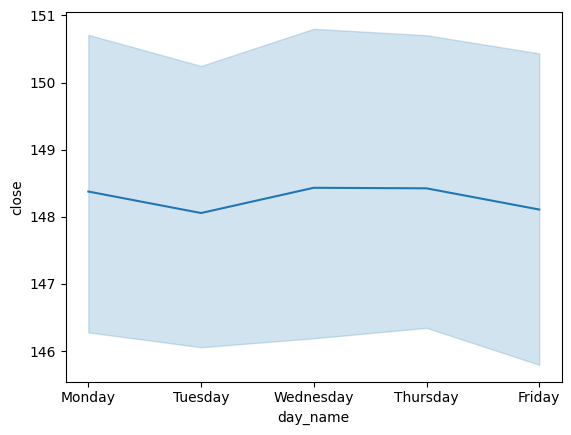

In [3]:
import seaborn as sns 

sns.lineplot(data=df, x=df['day_name'], y=df['close']);